[ 1.20306630e+00 -1.14283441e-03]


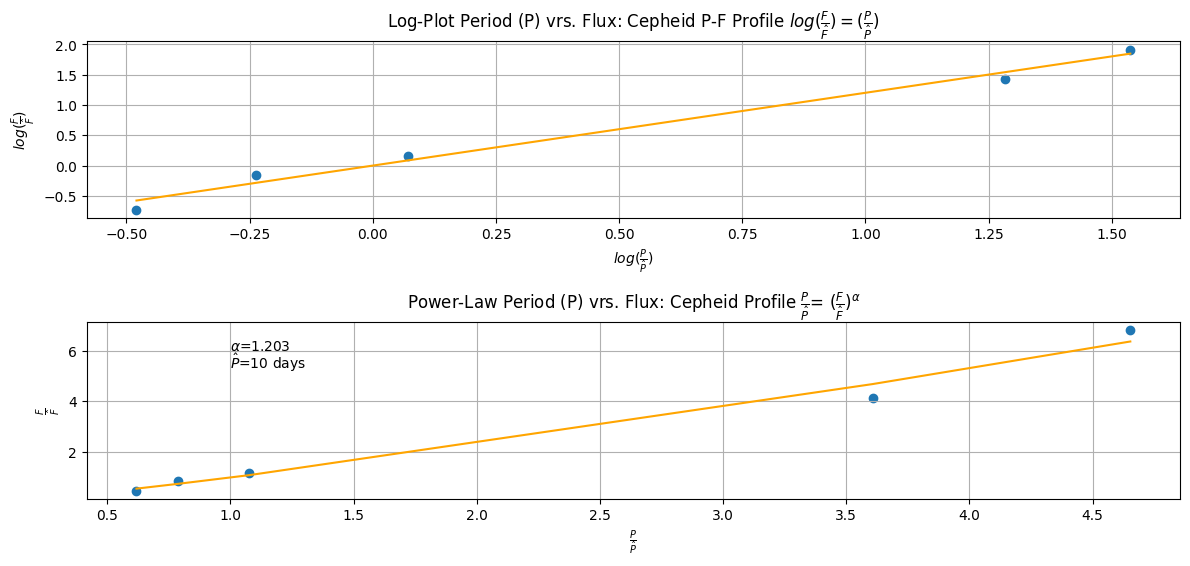

In [8]:
##### import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit


def chi_squared(theory:np.array,data:np.array,sigma:np.array)->np.array:
    """
    This function calculates TOTAL chi-squared between Theory and Data using sigma 
    as errors.
    The 3 arrays must be of equal size.
    Note: This is NOT reduced chi-squared
    Usage:  
     inputs: theory = input hypothesis (or Theory)
             data = Data points
             sigma = uncertainty on data points
     output: if arrays are of equal size returns the TOTAL chi-squared
             if arrays are not of equal size returns -1.0
    """
    if np.size(theory)==np.size(data) and np.size(data)==np.size(sigma):
        return np.sum((theory-data)**2/sigma**2)
    else:
        print('error - arrays of unequal size')
        return -1.

    
    
line= lambda x,m,b:m*x+b
power_law= lambda p,alpha : p**alpha
P=[10.75,46.53,6.19,36.07,7.89]
P=[p/10.0 for p in P]
F=[1.17,6.8,.48,4.15,.86]
P_hat=10

p0 = 0,0
poptl, pcovl=curve_fit(line,np.log(P),np.log(F),p0)


cepheid=pd.DataFrame(list(zip(P, F)),columns=['P','F']) 
print(poptl)
plt.figure(figsize= (12,8))
plt.subplot(3,1,1)
plt.scatter(np.log(cepheid.P),np.log(cepheid.F))
plt.plot(np.sort(np.log(cepheid.P)),line(np.sort(np.log(P)),poptl[0],poptl[1]),color='orange')
plt.xlabel(r"$log(\frac{P}{\hat{P}})$")
plt.ylabel(r"$log(\frac{F}{\hat{F}})$")
plt.title(r"Log-Plot Period (P) vrs. Flux: Cepheid P-F Profile $log(\frac{F}{\hat{F}})=(\frac{P}{\hat{P}})$")
plt.grid('--')

plt.subplot(3,1,2)
plt.scatter(cepheid.P,cepheid.F)
plt.plot(np.sort(cepheid.P),
         power_law(np.sort(cepheid.P),poptl[0]),
         color='orange')

plt.xlabel(r"$\frac{P}{\hat{P}}$")
plt.ylabel(r"$\frac{F}{\hat{F}}$")
plt.title(r"Power-Law Period (P) vrs. Flux: Cepheid Profile $\frac{P} {\hat{P}}$= $(\frac{F} {\hat{F}})^\alpha$")
plt.annotate(r"$\alpha$="+f"{np.round(poptl[0],3)}",(1,6))
plt.annotate(r"$\hat{P}$="+f"{P_hat} days",(1,5.3))

# plt.xlabel("$\ frac{P} {} $")
# plt.ylabel(r"log($\frac{F} {F} $)")
plt.grid('--')
plt.tight_layout()
plt.show()

0    10.75
1    46.53
2     6.19
3    36.07
4     7.89
Name: P, dtype: float64